# **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# Bussines Problem Understanding

### Context 

Biro sensus di california menerbitkan Data Sensus harga properti di California tahun 1990, data tersebut mencakup 10 jenis atribut seperti: populasi, pendapatan rata-rata, harga median rumah, dan sebagainya. Dataset ini juga berfungsi sebagai masukan untuk proyek properti dan mencoba menentukan kebutuhan fungsional dan non funfsional untuk proyek tersebut.

### Problem Statement

Sebuah perusahaan properti California ingin meningkatkan strategi penjualan propertinya dengan melakukan pendekatan yang lebih holistik dan spasial. Dalam menghadapi kompleksitas pasar properti yang terus berubah, perusahaan ini mengambil langkah proaktif dengan memanfaatkan data sensus tahun 1990 untuk memprediksi harga rumah diberbagai area/kawasan agar pembangunan properti tidak salah dalam penentuan harga dan lokasinya. Dengan begitu, perusahaan dapat memaksimalkan potensi penjualan dan memberikan penawaran yang lebih memuaskan kepada pelanggan.

### Goals 

Tujuan dari pemodelan ini adalah perusahaan dapat membangun sebuah model prediksi harga rumah yang dapat memberikan pandangan secara keseluruhan terkait faktor-faktor seperti populasi, pendapatan median dan karakteristik distrik. Hal ini dapat membantu perusahaan menentukan harga jual properti secara lebih optimal, meningkatkan daya saing dipasar dan merespon dinamika pasar yang kompleks diCalifornia. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti seperti: jumlah kamar, lokasi dan pendapatan rata-rata dapat menambah ke-akuratan prediksi harga jual yang dapat meningkatkan profit bagi perusahaan properti.

### Analytic Approach

Hal yang perlu dilakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan 1 properti dengan properti lainnya.
Serta membangun sebuah model regresi sebagai alat untuk membantu sebuah perusahaan properti dalam membuat keputusan yang lebih baik dalam menjual properti sehingga harga properti yang overprice dan underprice dapat dihindari.

### Metric Evaluation

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE

- RMSE adalah nilai rataan akar kuadrat dari error

- MAE adalah rataan nilai absolut dari error

- MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga jual sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

# Data Understanding

- Dataset merupakan data California housing dari sensus tahun 1990.
- Setiap baris data merepresentasikan informasi terkait properti.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Longitude | Float | Garis bujur dari sekumpulan rumah tertentu. |
| Latitude | Float | Garis lintang dari sekumpulan rumah tertentu. |
| Housing_median_age | Float | Median umur/usia sebuah rumah dalam satu blok. |
| total_rooms | Float | jumlah total kamar dalam satu blok rumah. |
| total_bedrooms | Float | jumlah total kamar tidur dalam satu blok. |
| Population | Float | Jumlah total orang yang tinggal dalam satu blok. |
| Households | Float | Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, dalam satu blok. |
| median_income | Float | Median pendapatan rumah tangga dalam satu blok rumah. |
| ocean_proximity | Object | Lokasi rumah yang berdekatan dengan lautan. |
| medianHouseValue | Float |  Median nilai rumah rumah tangga dalam satu blok |


### Import Library dan Dataset

In [3]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os, tarfile, urllib.request

import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

PROJECT_ROOT_DIR = "."
ID = "California Housing"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", ID)
if not os.path.isdir(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Load dataset
df= pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Terdapat 14448 Baris data dan 10 column pada dataset California_Housing_Pride dimana :

- 9 feature merupakan tipe numerikal (longitude, latitude, housing_median_age, total_rooms. total_bedrooms, population, households, median_income, dan median_house_value)
- 1 feature merupakan data dengan tipe objek atau kategorikal yaitu ocean_proximity

In [6]:
# Membuat duplikasi dataframe agar tidak merubah data masternya
df_house = df.copy()

### Exploratory Data Analysis

Kita akan melihat sebaran datanya secara spasial untuk melihat mana kah lokasi properti yang paling massif

Saving Figure Geographical Plot


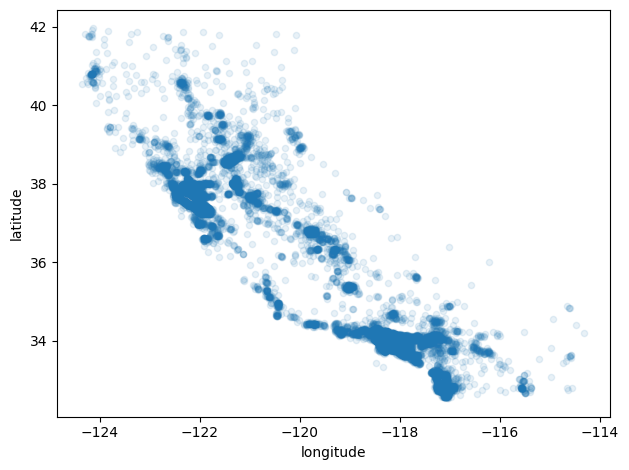

In [7]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("Geographical Plot")

Saving Figure Geographical Plots


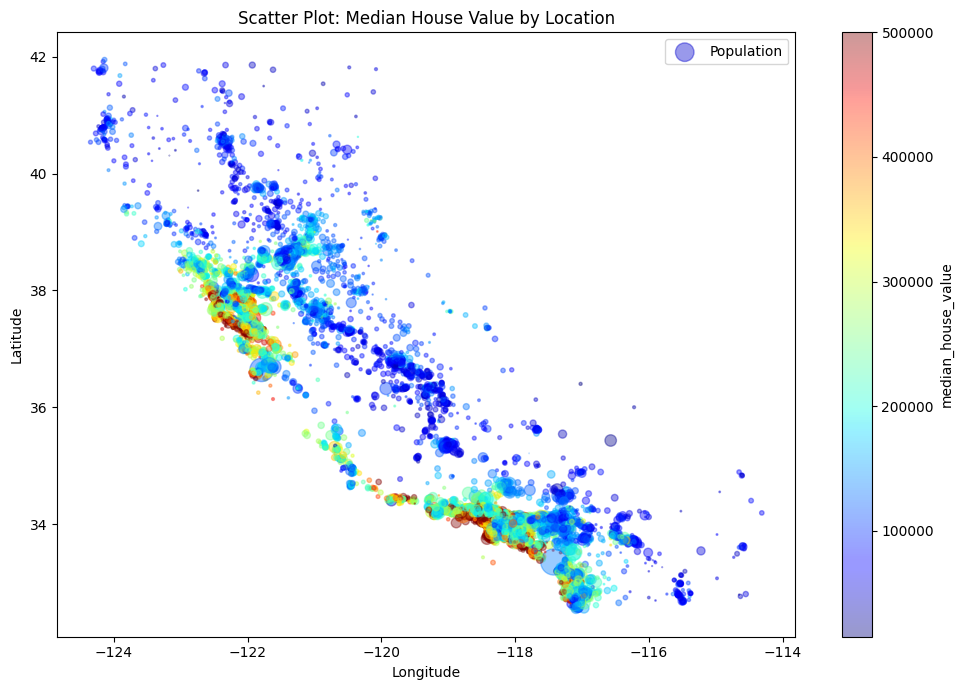

In [8]:
df_house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=df["population"]/100, label="Population", figsize=(10, 7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, 
            sharex=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot: Median House Value by Location')
plt.legend()
save_fig("Geographical Plots")

Dari sebaran data di atas dapat dilihat bahwa harga jual properti yang paling tinggi berada di kawasan Pesisir. Sedangkan harga properti yang berada di area INLAND cenderung murah.

Selanjutnya kita akan melihat persebaran properti berapa banyak properti yg berada di inland, atau bahkan near bay dan sebagainya. Data yang digunakan adalah data dari column `Ocean_Proximity`

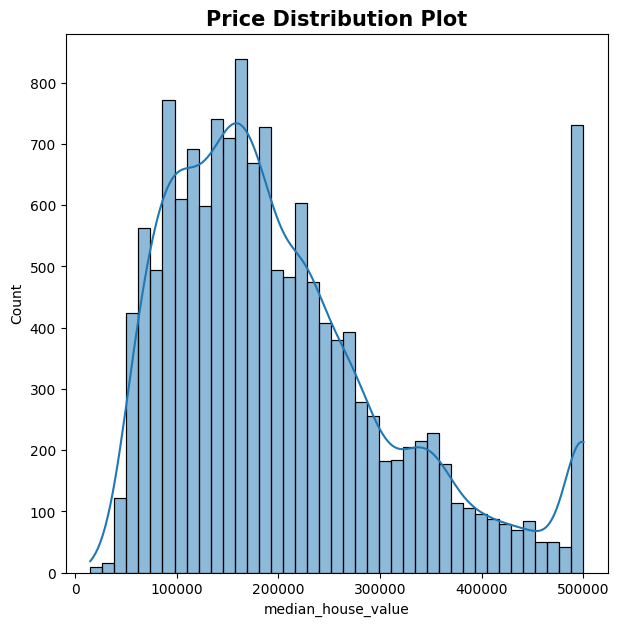

In [9]:
# Melihat istribusi fitur 'median house value'
plt.figure(figsize=(7, 7))
sns.histplot(df_house['median_house_value'], kde=True)
plt.title('Price Distribution Plot', size=15, weight='bold');

Dari histogram plot di atas dapat dilihat bahwa data pada kolom median_house_value tidak terdistribusi normal, terdapat right-skewed distribustion dengan grafik yang miring ke kanan.

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

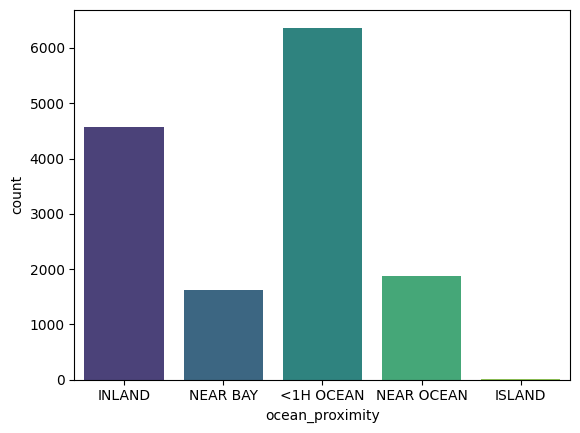

In [10]:
# Melihat banyaknya jumlah rumah di setiap kategori area (ocean proximity)
sns.countplot(data=df_house, x='ocean_proximity', palette = 'viridis')
ocean_proximity_counts = df_house['ocean_proximity'].value_counts()
ocean_proximity_counts

Berdasarkan grafik di atas yang merupakan data dari jarak rumah dengan laut, dapat dilihat bahwa Mayoritas Penduduk California tinggal tidak jauh dari pesisir/laut dengan estimasi jarak antara laut dengan perumahan adalah sekitar 1 jam. Hal ini dikarenakan memang secara geografis California berada di dekat laut dan Pantai California telah lama menjadi subjek yang menarik bagi banyak orang dengan tujuan resort yang idealsepanjang tahun dengan akses mudah ke laut dan pegunungan.

In [11]:
# Merubah satuan median income ( agar sama dengan median house value)
df_house['median_income'] = df_house['median_income']*10000

Text(0.5, 1.0, 'Median Income Mapping')

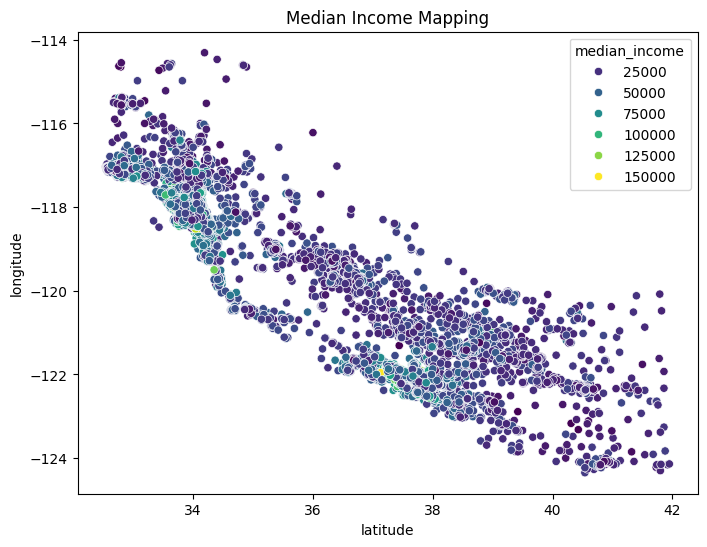

In [12]:
# Melihat sebaran pendapatan secara spasial
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_house,x='latitude',y='longitude',hue='median_income',palette='viridis',sizes=(10,100))
plt.title('Median Income Mapping')

Dapat dilihat dari visualisasi pendapatan secara spasial : di mana rata-rata pendapatan di suatu blok hunian relatif lebih tinggi berada di kawasan pesisir dibandingkan dengan kawasan yang jauh dari pesisir/pantai

Text(0.5, 1.0, 'Housing Median Age Mapping')

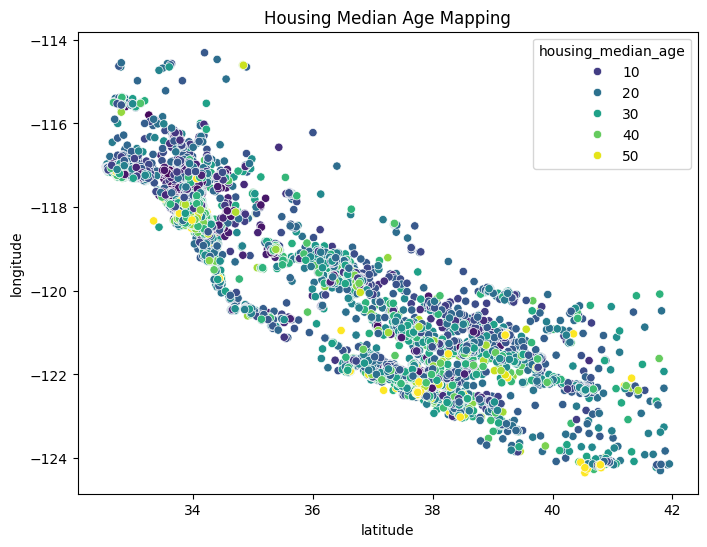

In [13]:
# Melihat sebaran rata-rata usia rumah secara spasial
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_house,x='latitude',y='longitude',hue='housing_median_age',palette='viridis',sizes=(10,100))
plt.title('Housing Median Age Mapping')

Pemetaan rata-rata usia bangunan hunian di California adalah 10-50 tahun dan tersebar secara acak di bagian Negara California

In [14]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,38666.674073,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,18911.578045,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,4999.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,25706.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,35391.000000,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,47361.000000,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,150001.000000,500001.000000


Terlihat bahwa terdapat perbedaan yang signifikan antara nilai mininal dan maksimal. Hal ini dapat berarti bahwa terdapat portensi distribusi data yang tidak normal atau terdapat adanya outlier yang signifikan. Hal ini nantinya akan dicek di Data Preprocessing

# Data Preprocessing

- Penambahan Feature

**Pengecekan/Data Cleaning :**

- Data Dupllikasi
- Cek Missing Value
- Korelasi Data
- Cek Distribusi
- Outlier

 ### Add New Column

Dengan asumsi bahwa 1 KK menempati 1 rumah, maka diperlukan kolom rata-rata banyak kamar tidur per rumah dan Rata-rata banyak ruangan per rumah yang diperoleh dengan membagi total_bedrooms dan total_rooms dengan households. Penambhahan fitur ini cukup penting untuk nantinya dapat melihat hubungan antara harga jual dengan banyaknya kamar tidur per-rumah dan banyaknya ruangan per-rumah

1. Rata-rata banyak kamar tidur per rumah: total_bedrooms/households
2. Rata-rata banyak ruangan per rumah: total_rooms/households

In [15]:
df_house["rooms_per_household"] = round(df_house["total_rooms"]/df_house["households"])
df_house["bedrooms_per_room"] = round(df_house["total_bedrooms"]/df_house['households'])
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,19750.0,INLAND,47500.0,3.0,1.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,22604.0,NEAR BAY,100000.0,4.0,1.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,62990.0,<1H OCEAN,285800.0,6.0,1.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,17199.0,<1H OCEAN,175000.0,3.0,1.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,22206.0,INLAND,59200.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,44125.0,INLAND,144600.0,6.0,1.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,29135.0,INLAND,159400.0,5.0,1.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,31977.0,NEAR OCEAN,289300.0,4.0,NaN
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,56315.0,<1H OCEAN,484600.0,5.0,1.0


In [16]:
# Mengecek data duplikat
df_house.duplicated().sum()

0

In [17]:
# Mengecek Missing Value
df_house.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms         137
population               0
households               0
median_income            0
ocean_proximity          0
median_house_value       0
rooms_per_household      0
bedrooms_per_room      137
dtype: int64

terdapat missing Value Pada colomns `total_bedrooms` dan `bedrooms_per_room` sebanyak 137 row. Pada column tersebut tidak akan dihapus (drop column) melainkan akan diisi (imputation) berdasarkan nilai rata-rata

<Axes: >

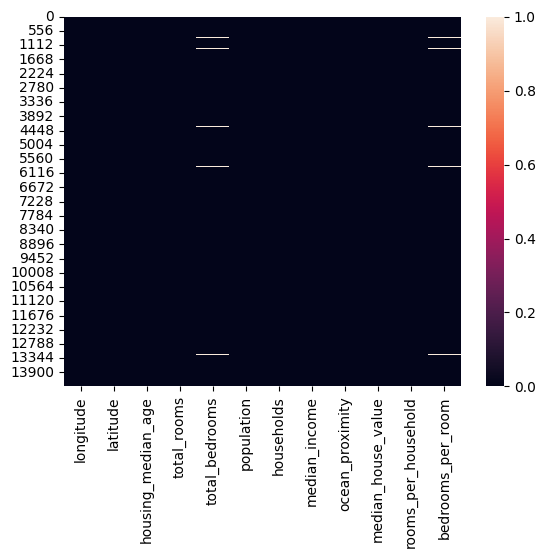

In [18]:
sns.heatmap(df_house.isnull())

In [19]:
#Handling Missing Value pada column 'total_bedrooms'
print(df_house.iloc[:,4:5].head())
imputer = SimpleImputer(strategy ="median")
imputer.fit(df_house.iloc[:,4:5])
df_house.iloc[:,4:5] = imputer.transform(df_house.iloc[:,4:5])
df_house['bedrooms_per_room'] = round(df_house['total_bedrooms'] / df_house['households'])
df_house.isnull().sum()

   total_bedrooms
0            28.0
1           328.0
2           396.0
3          1196.0
4           194.0


longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
ocean_proximity        0
median_house_value     0
rooms_per_household    0
bedrooms_per_room      0
dtype: int64

Handling Missing Value pada column `total_bedrooms` dan `bedrooms_per_room`  menggunakan imputer atau mengisi kolom-kolom yang kosong dengan nilai rata-rata dari kolom 'total_bedrooms'. Pada Handling Missing Value ini menggunakan 'SimpleImputer' di mana strategi ini akan meggantikan nilai-nilai yang hilang dengan nilai mediannya.

<Axes: >

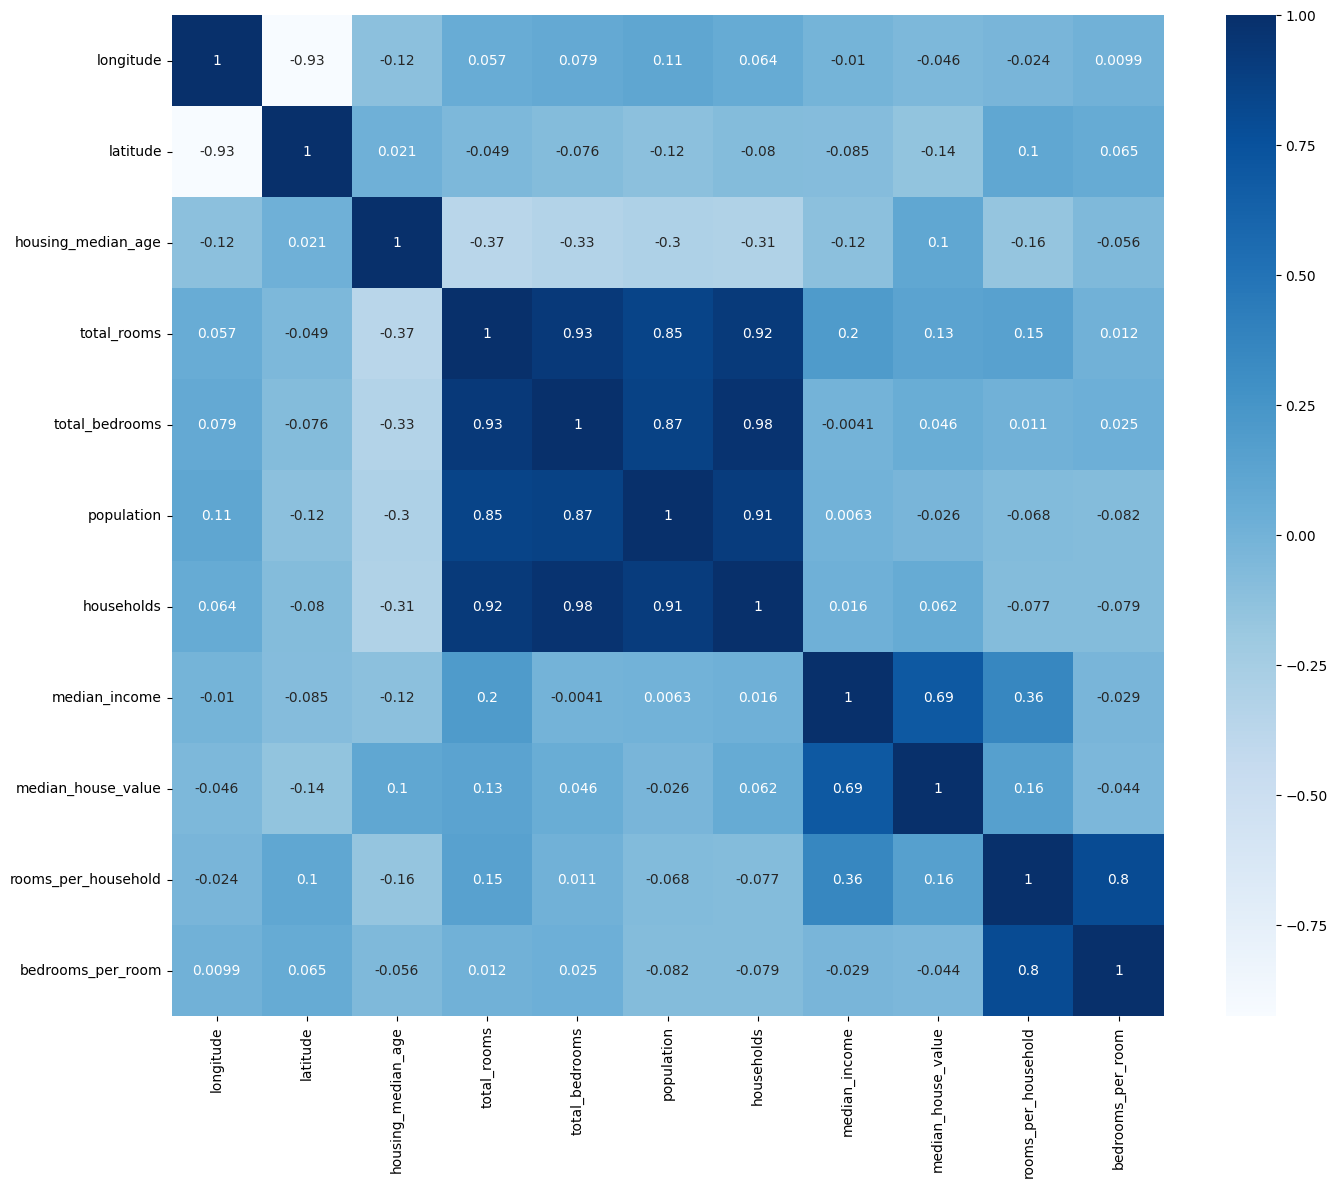

In [20]:
plt.figure(figsize=(16, 13))
sns.heatmap(df_house.select_dtypes(exclude=['object']).corr(), cmap='Blues', annot=True)

- Nilai yang mendekati 1 menunjukkan korelasi positif yang kuat (saat satu variabel naik, variabel lainnya cenderung naik).
- Nilai yang mendekati -1 menunjukkan korelasi negatif yang kuat (saat satu variabel naik, variabel lainnya cenderung turun).
- Nilai yang mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi linear antara variabel.

Dapat dilihat juga bahwa fitur households memiliki korelasi yang tinggi dan positif dengan `total_bedrooms` sebesar 0,98. hal ini berarti jika dalam 1 KK memiliki anggota yang cukup banyak, maka jumlah kamarnya pun juga semakin banyak.

`Median_house_value` dengan median income juga memiliki korelasi postif yang tinggi. Hal ini berarti menunjukkan bahwa jika `median_income` naik maka rata-rata harga rumah juga akan naik.

Dapat dilihat juga dari data di atas bahwa, fitur yang yang paling berkorelasi dengan `median_house_value` itu adalah `median_income`, jadi semakin besar pendapatan rata2 di suatu wilayah maka semakin besar pula harga rumahnya

 ### Distribusi Data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'bedrooms_per_room'}>, <Axes: >]],
      dtype=object)

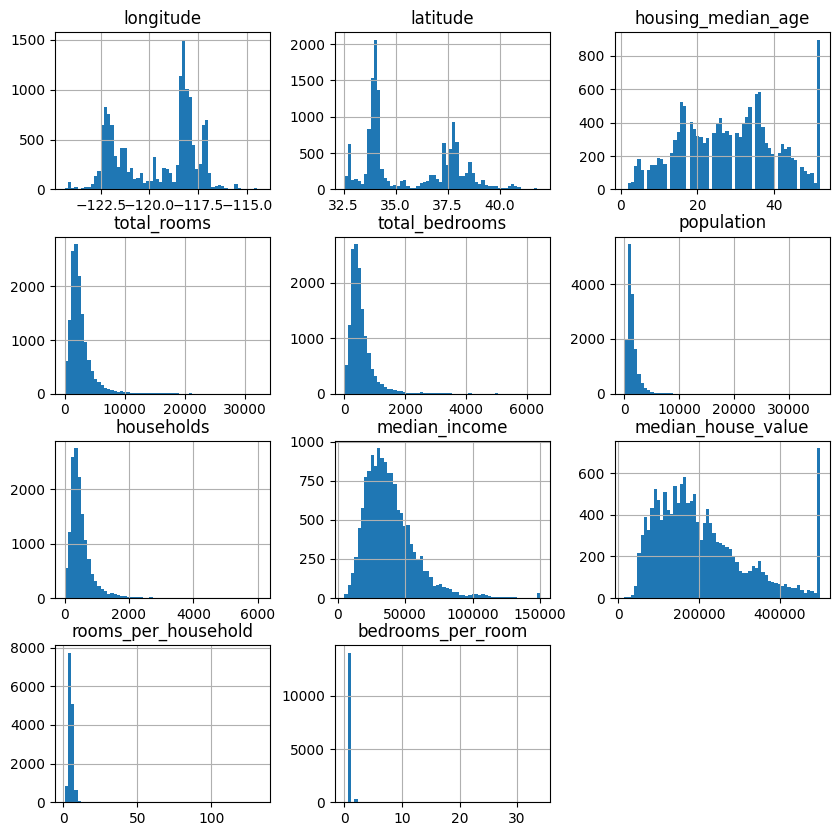

In [21]:
#Cek Distribusi Data
df_house.hist(bins=60,figsize=(10,10))

Dapat dilihat pada skewnees di atas bahwa bentuk yang tidak simetris menandakan adanya sebaran distribusi yang tidak normal. Pada `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `rooms_per_household` dan ``bedrooms_per_rooms` terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur tersebut. Jika terdapat skewness positif dalam distribusi data, hal ini mengindikasikan bahwa ekor distribusi lebih panjang di sisi kanan dan ada lebih banyak nilai ekstrim yang tinggi daripada yang rendah. Maka dari itu perlu dilakukan transformasi data.

Selain itu dapat dilihat juga bahwa terdapat outlier data yang cukup signifikan pada fitur `housing_median_age`, dan `median_house_value`

 ### Cek Outlier

<Axes: >

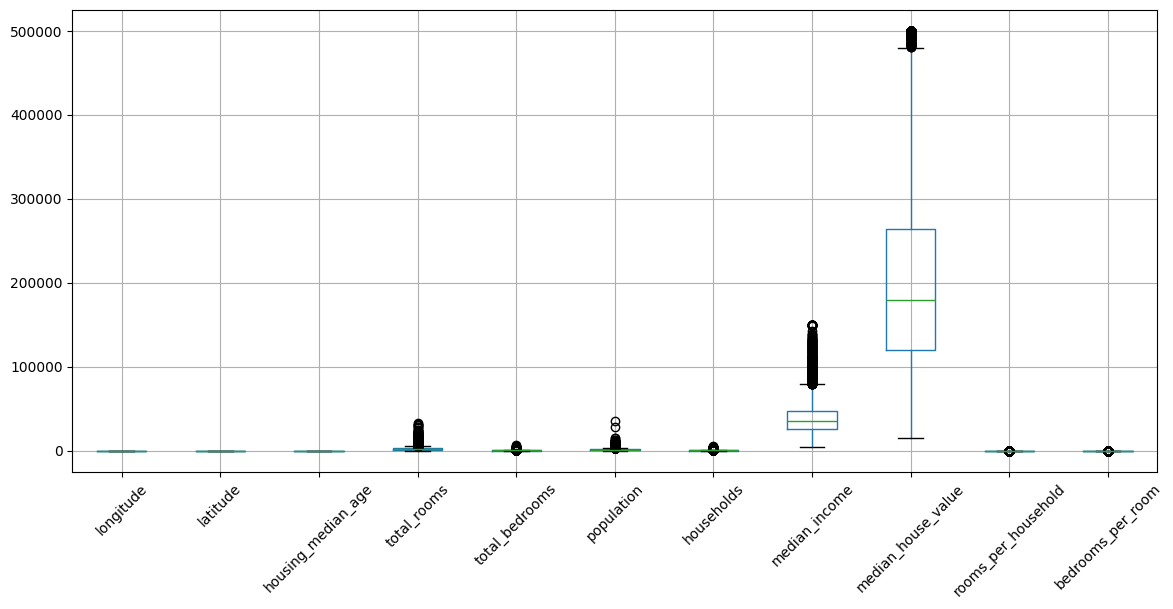

In [22]:
plt.figure(figsize=(14, 6))
df_house.boxplot(rot=45)

Berdasarkan visualisasi di atas dapat dilihat bahwa terdapat outliers di beberapa fitur, karena cukup banyak data outlier yang ada dan apabila dihapus dapat mengurangi hingga mempengaruhi keakuratan informasi, maka dari itu, fitur-fitur dengan outlier yang ekstrem saja yang akan dihapus. Di sini kita akan menghapus outlier pada kolom `median_house_value`

In [23]:
#membuat fungsi untuk mengecek outlier
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [24]:
# Outliers pada fitur median house value
detect_outliers(df_house['median_house_value'])

IQR: 144300.0
limit_bawah: -96850.0
limit_atas: 480350.0


In [25]:
# cek Banyanknya Median House Value > 48045.0 (limit atas)
df_house[df_house['median_house_value'] > 480350.0].count()['median_house_value']

757

Terdapat 757 baris data yang berada atau sekitar 5,2% data yang berada di atas limit 480350 USD ( batas atas berdasarkan metode IQR). Maka dari itu, harga rata-rata rumah yang lebih besar dari nilai limit tidak akan dimasukan ke dalam pemodelan. Hal ini dilakukan agar skwenessnya berkurang.

In [26]:
#Menyaring data dengan median_house_value di atas batas ambang
filter = df_house[df_house['median_house_value'] <= 480350.0]
filter

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,19750.0,INLAND,47500.0,3.0,1.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,22604.0,NEAR BAY,100000.0,4.0,1.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,62990.0,<1H OCEAN,285800.0,6.0,1.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,17199.0,<1H OCEAN,175000.0,3.0,1.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,22206.0,INLAND,59200.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,22375.0,INLAND,64300.0,5.0,1.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,44125.0,INLAND,144600.0,6.0,1.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,29135.0,INLAND,159400.0,5.0,1.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,31977.0,NEAR OCEAN,289300.0,4.0,1.0


In [27]:
df_house = df_house[(df_house['median_house_value'] <= 480350.0)]
pd.DataFrame(df_house['median_house_value'].describe())

,median_house_value
count,13691.000000
mean,190661.719159
std,95174.556513
min,14999.000000
25%,116300.000000
50%,173400.000000
75%,246200.000000
max,480100.000000


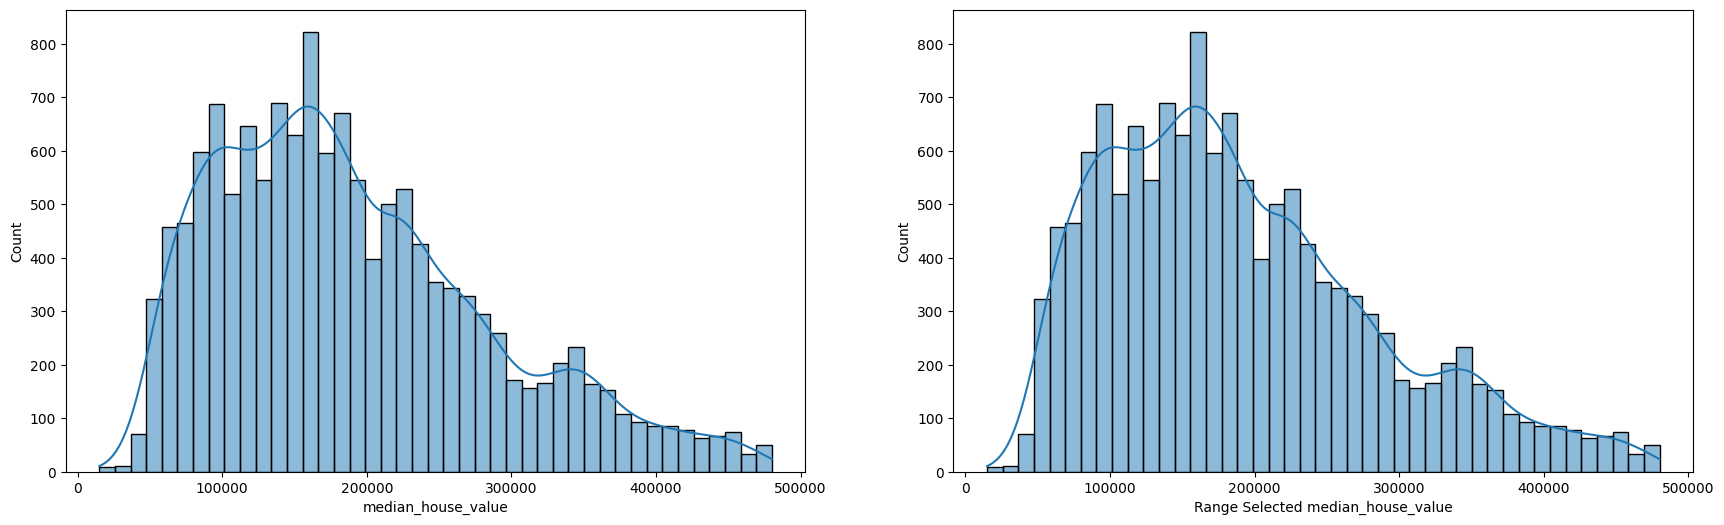

In [28]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(df_house['median_house_value'], ax=axes[0], kde=True)
sns.histplot(df_house['median_house_value'], ax=axes[1], kde=True)
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected median_house_value');

Dalam proses eksplorasi dataset, kita sudah mengetahui bahwa column `ocean_proximity` dengan kategori ISLAND hanya berjumlah 2. Karerna jumlah ini sangat sedikit untuk masuk dalam proses training, validation dan testing. Maka Kategori ISLAND akan dihapus

In [29]:
# Menghapus kategori 'ISLAND' pada column 'ocean_proximity'
df_house = df_house[df_house['ocean_proximity'] != 'ISLAND']
ocean_proximity_counts = df_house['ocean_proximity'].value_counts()
ocean_proximity_counts

ocean_proximity
<1H OCEAN     5958
INLAND        4558
NEAR OCEAN    1710
NEAR BAY      1463
Name: count, dtype: int64

sebelum modeling, kita cek dulu dataset yang sudah dicleaning

In [30]:
df_house.reset_index(drop=True,inplace=True)
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
count,13689.000000,13689.000000,13689.000000,13689.000000,13689.000000,13689.000000,13689.00000,13689.000000,13689.000000,13689.000000,13689.000000
mean,-119.557816,35.651370,28.325079,2622.325152,539.385930,1442.237636,501.38089,36573.512455,190638.278691,5.353569,1.047776
std,2.008295,2.155417,12.494585,2189.856032,424.072666,1162.297754,385.02733,15436.362748,95158.641940,2.320983,0.473645
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.00000,4999.000000,14999.000000,1.000000,0.000000
25%,-121.760000,33.930000,18.000000,1439.000000,297.000000,794.000000,281.00000,25250.000000,116300.000000,4.000000,1.000000
50%,-118.500000,34.270000,28.000000,2110.000000,435.000000,1182.000000,412.00000,34464.000000,173400.000000,5.000000,1.000000
75%,-117.990000,37.730000,37.000000,3123.000000,646.000000,1746.000000,607.00000,45615.000000,246100.000000,6.000000,1.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.00000,150001.000000,480100.000000,133.000000,34.000000


In [31]:
# Cek Data yang sudah bersih
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13689 entries, 0 to 13688
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            13689 non-null  float64
 1   latitude             13689 non-null  float64
 2   housing_median_age   13689 non-null  float64
 3   total_rooms          13689 non-null  float64
 4   total_bedrooms       13689 non-null  float64
 5   population           13689 non-null  float64
 6   households           13689 non-null  float64
 7   median_income        13689 non-null  float64
 8   ocean_proximity      13689 non-null  object 
 9   median_house_value   13689 non-null  float64
 10  rooms_per_household  13689 non-null  float64
 11  bedrooms_per_room    13689 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.3+ MB


Pada akhirnya, tersisa 13689 baris data dari yang awalnya 14448 baris data yang akan digunakan untuk pemodelan. Hal ini berarti terdapat 759 data yang sudah dieliminasi.

# Modeling

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

> ### Encoding

Dalam data set **California_housing_price** masih terdapat column yang non-numerik/ kategorikal. Untuk dapat menggunakan semua fitur yang ada dalam data set tersebut, maka fitur-fitur yang merupakan fitur kategorikal diubah menjadi numerikal menggunakan columntransformer.

Di sini kita munggunakan **One Hote Encoding** sebagai transformasi data, hal ini dikarenakan data uniq pada kolom kategorikal relatif kecil, makan OneHoteEncoder menjadi pilihan yang baik karena akan menghasilkan matriks dengan jumlah kolom tambahan yang terbatas

In [33]:
# mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('encoder_onehot', OneHotEncoder(handle_unknown = 'ignore'), ['ocean_proximity']),
], remainder='passthrough')

> ### Scaling

In [34]:
# mengubah skala fitur (feature scaling) menggunakan Robust Scaler
scaler = RobustScaler()

> ### Dataset Spliting

Splitting data set bertujuan untuk mengevaluasi kinerja model secara objektif dan menghindari overfitting

In [35]:
# Define x,y
X = df_house.drop(columns=['median_house_value'])
y = df_house['median_house_value']

In [36]:
# Splitting data training dan test dengan proporsi 70:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=10)

> ### Benchmark Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [38]:
# Define Algoritma 
lr = LinearRegression()
knn = KNeighborsRegressor()
dtr = DecisionTreeRegressor(random_state=10)
rfr = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10,objective ='reg:squarederror')

Terdapat 5 Algoritma model yang digunakan, antara lain :

1. Linear Regresi
2. K-Neighbors Regressor
3. Random Forest Regressor
4. Decision Tree Regressor
5. XGBoost Regressor

In [39]:
models = [lr,knn,dtr,rfr,xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=10)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


[-60295.68792876 -60296.00230831 -57934.37655654 -60879.46057236
 -60770.45257999] LinearRegression()
[-44590.77316294 -44507.58401826 -43802.92968037 -44022.05115937
 -45247.97305936] LinearRegression()
[-0.27257183 -0.27355871 -0.26334684 -0.27935022 -0.27542632] LinearRegression()
[-56432.43092625 -58108.50583766 -56991.45361372 -55802.88363443
 -57701.6175244 ] KNeighborsRegressor()
[-40174.03925148 -41337.6260274  -41227.46127854 -39383.53424658
 -40791.21506849] KNeighborsRegressor()
[-0.23446129 -0.24431769 -0.2376858  -0.23604745 -0.23742885] KNeighborsRegressor()
[-64055.66269521 -63139.8593976  -66515.08309052 -65815.15789795
 -66025.0548991 ] DecisionTreeRegressor(random_state=10)
[-43695.20766773 -43091.50730594 -44383.78995434 -44069.26940639
 -44030.45707763] DecisionTreeRegressor(random_state=10)
[-0.25354361 -0.25311616 -0.24920583 -0.25998327 -0.25591546] DecisionTreeRegressor(random_state=10)
[-45265.10083948 -45261.38659896 -45941.51356808 -45479.54585209
 -46842.030

> ### Model Selection

In [40]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-60035.195989,1077.283919,-44434.262216,502.094777,-0.272851,0.005287
1,KNN Regressor,-57007.378307,833.795590,-40582.775174,725.825190,-0.237988,0.003367
2,DecisionTree Regressor,-65110.163596,1288.558313,-43854.046282,439.264275,-0.254353,0.003545
3,RandomForest Regressor,-45757.915428,595.971477,-31516.729289,440.914051,-0.188178,0.004156
4,XGBoost Regressor,-44101.620589,517.117804,-30102.935342,325.385003,-0.177375,0.002931


Berdasarkan rata-rata dan standar deviasi skor RMSE, MAE, dan MAPE, secara berurutan, model yang menunjukkan performa paling baik adalah **XGBoost**, **RandomForest** dan **KNN**

Oleh sebab itu, performa ketiga model ini akan dibandingkan secara lebih lanjut pada prediksi dataset test

### Prediction to Test Set with the Benchmark Model

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

# Benchmark 3 model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=10),
    'XGBoost': XGBRegressor(random_state=10,objective ='reg:squarederror'),
    'KNN' : KNeighborsRegressor()
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae,'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,43004.353244,28836.358952,0.179957
XGBoost,41761.668541,28483.129637,0.178062
KNN,53893.386898,37877.319576,0.228772


Dari 3 Model ini terlihat bahwa Model terbaik adalah XGBoost karena nilai dari keseluruhan matrix evaluasi yang dipakai adalah yang terkecil dibandingkan dengan RandomForest dan KNN

|  MODEL  | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| XGBoost | 41761.668 | 28483.129 | 0.1780 |


------

In [42]:
xgb = XGBRegressor(random_state=10)

score_rmse = []
score_mae = []
score_rmsle = []
score_mape = []

# Prediksi pada test set
xgb_bench = Pipeline([
('preprocessing', transformer),
('scaler', scaler),
('model', xgb)
])

xgb_bench.fit(X_train, y_train)
y_pred = xgb_bench.predict(X_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_rmsle.append(mean_squared_log_error(y_test, y_pred,squared=False))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning_rf = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape})
score_before_tuning_rf

,RMSE,MAE,MAPE
0,41761.668541,28483.129637,0.178062


In [43]:
# Skor R-Square sebelum tuning
xgb_bench.score(X_test,y_test)


0.8032847314750378

**Interpretasi:** Secara keseluruhan model benchmark XGB ini dapat mewakili 80% data.

Dari hasil pengujian data set di atas, dapat dilihat bahwa algoritma model yang paling baik adalah XGBoost. Selanjutnya, kita akan melakukan tuning untuk memastikan apakah benar XGBoost merupakan model yang paling terbaik

### Hyperparamter Tuning

Hypertuning atau Hyperparameter bertujuan untuk mencari konfigurasi optimal dari parameter-parameter yang memengaruhi kinerja model. Melalui hypertuning, kita dapat meningkatkan performa model, mengurangi risiko overfitting atau underfitting, meningkatkan efisiensi dalam penggunaan sumber daya komputasi, dan memperkuat penelitian serta inovasi dalam pengembangan model machine learning. Dengan kata lain, hypertuning membantu menyesuaikan model secara optimal terhadap data yang digunakan dan meningkatkan kemampuan model untuk membuat prediksi yang akurat pada data baru.

Setelah melakukan pengujian dataset, XGBoost merupakan model yang paling baik diantara yang lainnya. Biasanya XGBoost sering kali menjadi model yang paling baik diantara yang lainnya. Menurut Chen & Guestrin (2016) kesuksesaan XGBoost adalah scalability dalam berbagai skenario, menurutnya XGBoost mampu menyelesaikan permasalaha skala.

In [44]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [45]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# ---- Hyperparameter tuning ----
random_xgb = RandomizedSearchCV(
        estimator_xgb, 
        param_distributions = hyperparam_space_xgb,
        n_iter = 50,
        cv = crossval, 
        scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
        refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
        random_state = 48 )

In [46]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('encoder_onehot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_byn...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=48, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [47]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error',
                                                    'rank_test_neg_mean_absolute_error', 
                                                    'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
38,0.425546,0.027534,0.008872,0.000556,0.8,0.464159,148,7,0.11,1,...,490.181957,1,-0.167613,-0.176955,-0.173848,-0.162048,-0.175733,-0.171239,0.005609,1
35,0.317897,0.083697,0.008499,0.000515,0.8,0.001,144,6,0.19,6,...,346.905485,2,-0.171634,-0.184319,-0.180036,-0.167578,-0.177671,-0.176248,0.005966,2
44,0.233165,0.010488,0.008203,0.000393,0.9,3.593814,149,6,0.09,2,...,367.738216,4,-0.179467,-0.189235,-0.185070,-0.173121,-0.179624,-0.181303,0.005482,4
14,0.461954,0.005709,0.007681,0.000459,0.9,3.593814,141,8,0.27,8,...,220.232038,3,-0.174287,-0.188568,-0.182940,-0.174061,-0.180266,-0.180024,0.005478,3
46,0.211220,0.029233,0.007985,0.000472,0.4,0.007743,119,6,0.11,8,...,233.488231,5,-0.176409,-0.189406,-0.184533,-0.176412,-0.183745,-0.182101,0.005034,5


In [48]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -42719.24928694129
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 0.46415888336127775, 'model__n_estimators': 148, 'model__max_depth': 7, 'model__learning_rate': 0.11, 'model__gamma': 1, 'model__colsample_bytree': 0.8}


### Memprediksi untuk Menguji Set dengan Model

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [49]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=10)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)
y_pred_xgb_tuning = xgb_tuning.predict(X_test)


rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGB,40436.075636,26865.409296,0.168772


In [50]:
#Skor R-Square setelah tuning
xgb_tuning.score(X_test,y_test)

0.815574747688085

### Performance Comparison

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [51]:
# Sebelum hyperparameter tunning
pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,RMSE,MAE,MAPE
XGBoost,41761.668541,28483.129637,0.178062


In [52]:
# Setelah hyperparameter tuning
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGB,40436.075636,26865.409296,0.168772


**Model** mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning.

- **RMSE** before (41761.66) --> (40436.07), Selisih = (-1325.59)
- **MAE** before (28483.12) --> (26865.40), Selisih = (-1617.72)
- **MAPE** before (0.1780) --> (0.1687), selisih = (-0.0093)

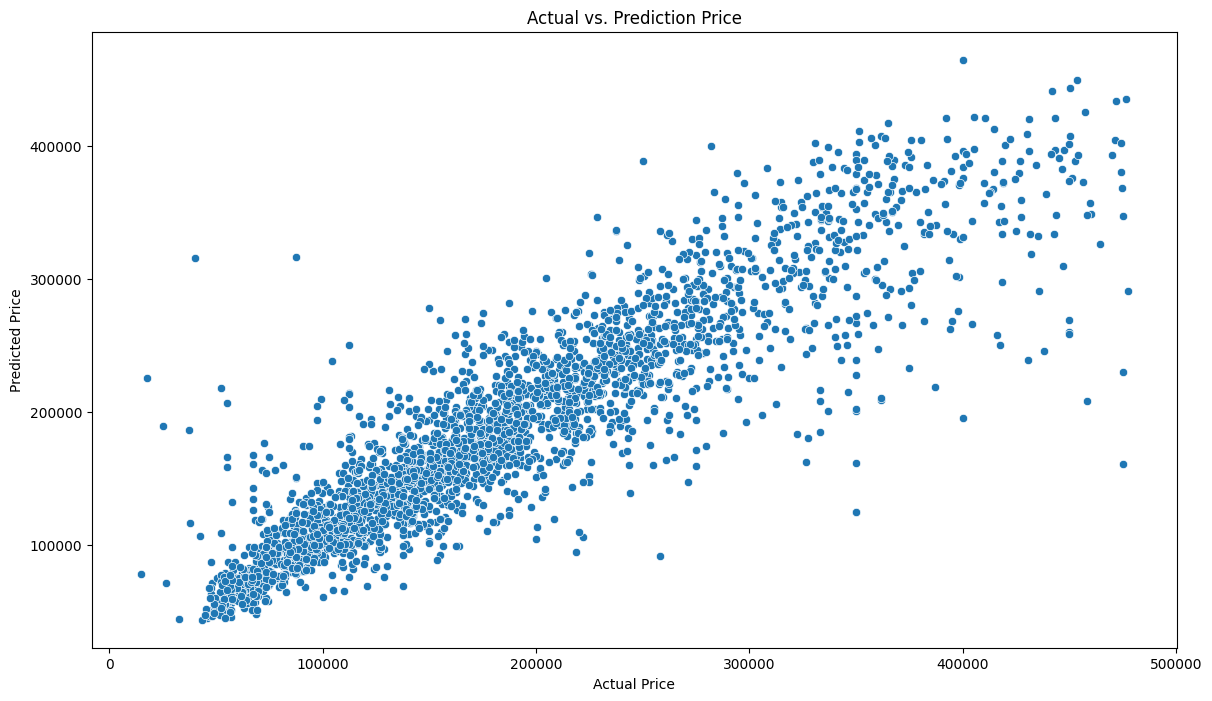

In [53]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                                xlabel='Actual Price', 
                                                ylabel='Predicted Price');

| MAPE-value      | Accuracy of Forecast | 
|-----------|------|
| less than 10%      | Highly Accurate Forecast  | 
| 11% to 20%     | Good  Forecast   | 
| 21% to 50%     | Reasonable  Forecast  | 
| More than 51%    |  Inaccurate Forecast  | 

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

Berdasarkan sebaran scatterplot di atas dapat dilihat bahwa harga aktual terlihat cukup baik dengan bentuk pola yang linear. Akan tetapi, ada sedikit eror pada data di mana harga actual yang seharusnya tinggi diprediksi rendah. Namun hal ini masih batas wajar karena menurut Lewis,C.D, nilai MAPE yang didapat sebesar 17% berarti dikategorikan Good **Forecast**

> ### Feature Importance

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances


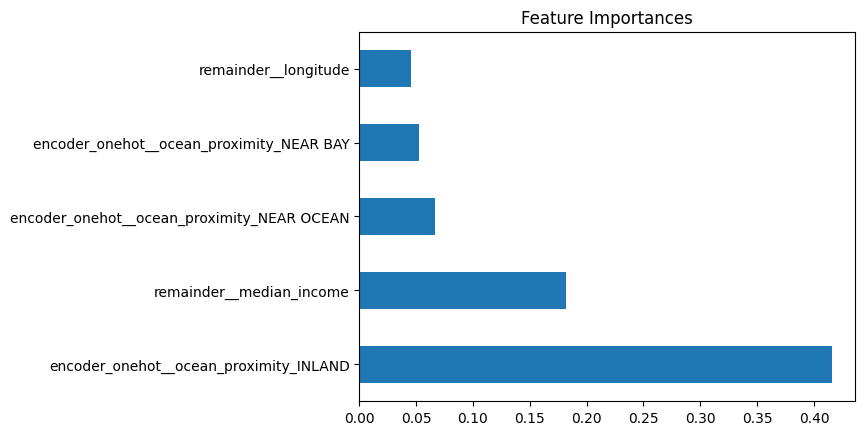

In [54]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out ()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Disini dapat dilihat bahwa fitur yang sangat mempengaruhi target(price) yaitu `encoder_onehot_ocean_proximity_INLAND`, `remainder_median_income` dan `one_hot_ocean_proximity_NEAR OCEAN`

# Conclusion
Setelah melakukan pemodelan, dapat disimpulkan bahwa :

1. Fitur `ocean_Proximity` dan `median_income` menjadi fitur yang paling mempengaruhi harga rata-rata sebuah properti/rumah. Feature lokasi atau dalam hal ini adalah `Ocean_Proximity` emnjadi prediktor yang paling kuat dalam menentukan harga rumah. Hal ini tentunya berkaitan dengan yang namanya 'Zona Nilai Tanah', Semakin dekat sebuah kawasan dengan perkotaan, atau dekat dengan kawasan wisata, maka harga rumah di kawasan tersebutpun juga akan naik. Seperti yang kita ketahui bahwa California merupakan sebuah negara bagian yang terletak di pesisir barat Amerika Serikat. Karna California merupakan sebuah negara yang terletak di bagian pesisirlah maka, kawasan pesisir di Negara ini begitu diminati. Hal ini juga berbanding lurus dengan median income di mana, rata-rata penghasilan seseorang pada suatu area akan mempengaruhi harga rumah di sekiatrnya. Semakin besar pendapatan, maka semakin besar pula harga rumah di daerah tersebut
2. XGBoost merupakan algoritma pemodelan yang paling baik diantara KNN dan Randomforest dalam memprediksi harga rumah. **RMSE** nilai **XGBoost** sebesar 41761.66, **MAE** sebesar 26865.40, dan **MAPE** sebesar 0.1687.
Nilai RMSE cukup tinggi, hal ini karena nilai **RMSE** sangat rentang terhadap outlier dan skala. Semakin besar nilai oulier dan skalanya, maka semakin besar pula nilai RMSE-nya.
3. Data California housing  price ini memilik outlier yang besar, namun fitur-fitur yang memiliki outlier tersebut tidak semuanya dihapus karena dikhawatirkan dapat mengakibatkan kehilangan informasi yang substansial. Maka dari itu, pada data ini digunakan metric **MAPE** untuk melihat evaluasi pemodelan. Karena **MAPE** tidak sensitif terhadap outlier. **MAPE** yang dihasilkan model sebesar 16%, itu artinya, persenan hasil antara data prediksi dengan data aktual hanya sekitar 17% (termasuk kategori good forecast)

# Recommendation
Berikut adalah rekomendasi untuk pengembangan model selanjutnya:

1. Penambahan fitur yang berkorelasi dengan harga rumah seperti luas rumah, nama perusahan develpoernya dan sebagainya.
2. Memperbarui data yang digunakan, karna data yang dimodelkan adalah data harga rumah tahun 1990. Tentu data ini sebenarnya sudah tidak relevan lagi jika digunakan untuk memprediksi harga rumah di tahun sekarang, berbagai faktor eksternal yang dapat mempengaruhi nilai jual rumah seperti inflasi, suku bunga dan sebagainya harus dipertimbangkan
3. Model ini sebaiknya digunakan untuk memprediksi harga rumah yang minimal USD 14999 dengan maksimal harga USD 50000. Hal ini dikarenakan agar rata-rata presentase kesalahan ablosut antara harga prediksi dan harga aktual sebesar 17%
4. Membandingkan performance model yang sudah dibuat menggunakan algoritma machine learning yang lain

# Save Model

> ### Import Pickle

In [55]:
import _pickle as pickle

> ### Save Machine Learning

In [56]:
estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('CaliforniaHousingPrice_XGB.sav', 'wb'))

### Load Machine Learning

In [57]:
filename = 'CaliforniaHousingPrice_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [58]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

41761.66854125803